# CALCULO VECTORIAL

# INDICE

1. [Diferenciación de funciones univariadas](#1.-Diferenciación-de-funciones-univariadas)  
    1.1. [Series de Taylor](#1.1.-Series-de-Taylor)  
        1.1.1. [Taylor polinomial](#1.1.1.-Taylor-polinomial)  
        1.1.2. [Taylor Series](#1.1.2.-Taylor-Series)  
    1.2. [Reglas de las derivadas](#1.2.-Reglas-de-las-derivadas)

# Funciones

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math
from manim import *

Manim Community v0.10.0

In [3]:
def dibujar_taylor_aproximacion(func, point, degree, x_range=(-10, 10), y_range=(-5, 5)):
    # Definir la variable y la función
    #x = sp.symbols('x')
    f = func
    # Calcular la serie de Taylor alrededor del punto dado hasta el grado especificado
    taylor_series = f.series(x, point, degree + 1).removeO()
    # Convertir la serie de Taylor a una función utilizable
    taylor_function = sp.lambdify(x, taylor_series, modules=['numpy'])
    # Crear un rango de valores x para graficar
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    # Evaluar la función original y la aproximación de la serie de Taylor en los valores de x
    f_vals = sp.lambdify(x, f, modules=['numpy'])(x_vals)
    taylor_vals = taylor_function(x_vals)
    # Graficar la función original y la aproximación de la serie de Taylor
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, f_vals, label='f(x)', color='blue')
    plt.plot(x_vals, taylor_vals, label=f'Taylor (degree {degree})', linestyle='--', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title(f'Aproximación de la serie de Taylor de f(x) alrededor de x={point}')
    plt.ylim(y_range[0], y_range[1])
    plt.grid(True)
    plt.show()
#x = sp.symbols('x')
#dibujar_taylor_aproximacion(sp.cos(x), 0, 8)
#dibujar_taylor_aproximacion(x**4, 0, 4, x_range=(-2, 2), y_range=(-5, 5))
#dibujar_taylor_aproximacion(x*sp.exp(-2*x), 0, 20)
#dibujar_taylor_aproximacion(sp.cos(x)**2, 0, 4, x_range=(-2, 2), y_range=(-5, 5))

def serie_taylor(func, x, x_0, degree, eval_point=None):
    series_list = []
    for k in range(degree + 1):
        taylor_series = func.series(x, x_0, k).removeO()  #Serie de Taylor hasta el término de orden "degree"
        series_list.append(taylor_series)
        print(f"T_{k}(x) = {sp.simplify(taylor_series)}")
        if eval_point is not None and k == degree:
            # Evaluar la serie de Taylor en el punto especificado al final del bucle
            taylor_evaluated = taylor_series.subs(x, eval_point)
            print(f"T_{k}({eval_point}) = {taylor_evaluated}")
            #return series_list if eval_point is not None else None
#serie_taylor(sp.cos(x), x, x_0=0, degree=10)
#serie_taylor(sp.cos(x), x, x_0=0, degree=10,eval_point=math.radians(45))

# [1. Diferenciación de funciones univariadas](#INDICE)

$$
f^{'}(x)=\frac{df}{dx}=\lim_{x \rightarrow 0}\frac{f(x+h)-f(x)}{h}
$$

## Representación gráfica de una derivada

In [2]:
%%manim -qm -v WARNING MiClase
class MiClase(MovingCameraScene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False}
        )
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")
        t = ValueTracker(0)  # Punto en el que se calculará la tangente
        def func(x):
            return 2 * (x - 5) ** 2
        # Gráfico de la función
        graph = ax.get_graph(func, color=MAROON)
        # Punto en el gráfico
        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)
        # Actualizador para el punto
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        # Línea tangente
        tangent_line = always_redraw(lambda: ax.get_secant_slope_group(t.get_value(), graph, dx=0.01, secant_line_length=4))
        # Animaciones
        self.add(ax, labels, graph, dot, tangent_line)
        self.play(t.animate.set_value(9))  # Mueve el punto para mostrar la recta tangente en otro lugar
        self.wait()

## [1.1. Series de Taylor](#INDICE)

Es una representación de una función $f$ como una suma infinita de términos. Estos términos son determinados usando derivadas de $f$ evaluadas en $x_0$.  
Se utilizan para aproximar funciones a través de una suma infinita de términos.

### [1.1.1. Taylor polinomial](#INDICE)

El Taylor polynomial de grado $n$ de $f: \mathbb{R}\rightarrow\mathbb{R}$ en $x_0$ es definido por:
$$
T_n(x)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k
$$
$$
Donde
\begin{cases}
f^{(k)}(x_0) : k^{th}\text{ derivada de }f\text{ en }x_0\\
\frac{f^{(k)}(x_0)}{k!} : \text{Coeficientes de la polinomial}
\end{cases}
$$

#### Ejemplo

Consideremos la polinomial: $x^4$  
Hallamos el Taylor polinomial $T_6$ evaluado en $x_0=1$  
Empezamos hallando los coeficientes $f^{(k)}(1)$ para $k=0,...,6$

$f(x)=x^4\rightarrow f(1)=x^4=1$  
$f'(x)=4x^3\rightarrow f'(1)=4$  
$f''(x)=12x^2\rightarrow f''(1)=12$  
$f^{3}(x)=24x\rightarrow f^{3}(1)=24$  
$f^{4}(x)=24\rightarrow f^{4}(1)=24$  
$f^{5}(x)=0\rightarrow f^{5}(1)=0$  
$f^{6}(x)=0\rightarrow f^{6}(1)=0$  

Por lo tanto el Taylor polinomial es:  

$\displaystyle T_6(x)=\sum_{k=0}^{6}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$  
$T_6(x)=1+4(x-1)+6(x-1)^2+4(x-1)^3+(x-1)^4+0$  
$T_6(x)=(1-4+6-4+1)+x(4-12+12-4)+x^2(6-12+6)+x^3(4-4)+x^4$  
$T_6(x)=x^4=f(x)$ (obtenemos una exacta representación de la función original)

In [33]:
x = sp.symbols('x')
serie_taylor(x**4, x, x_0=1, degree=6)

T_0(x) = 0
T_1(x) = 1
T_2(x) = 4*x - 3
T_3(x) = 6*x**2 - 8*x + 3
T_4(x) = 4*x**3 - 6*x**2 + 4*x - 1
T_5(x) = x**4
T_6(x) = x**4


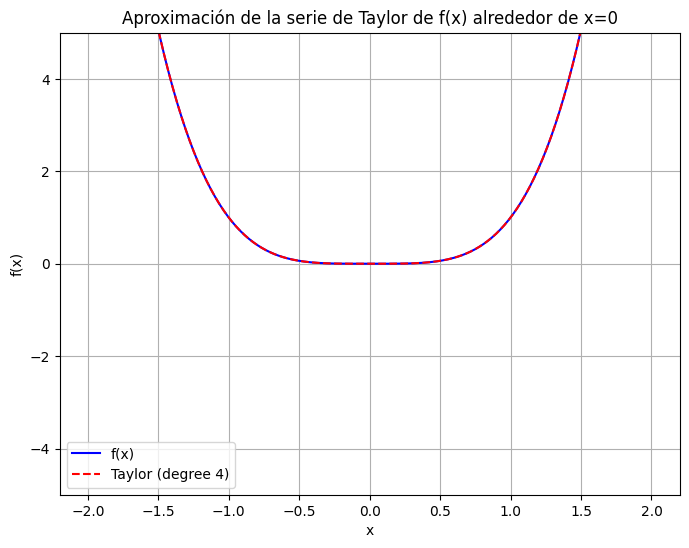

In [34]:
x = sp.symbols('x')
dibujar_taylor_aproximacion(x**4, 0, 4, x_range=(-2, 2), y_range=(-5, 5))

#### Ejemplo

funcion: $cos(x)$

In [5]:
x = sp.symbols('x')
serie_taylor(sp.cos(x), x, x_0=0, degree=10,eval_point=math.radians(180))

T_0(x) = 0
T_1(x) = 1
T_2(x) = 1
T_3(x) = 1 - x**2/2
T_4(x) = 1 - x**2/2
T_5(x) = x**4/24 - x**2/2 + 1
T_6(x) = x**4/24 - x**2/2 + 1
T_7(x) = -x**6/720 + x**4/24 - x**2/2 + 1
T_8(x) = -x**6/720 + x**4/24 - x**2/2 + 1
T_9(x) = x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
T_10(x) = x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1
T_10(3.141592653589793) = -0.976022212623608


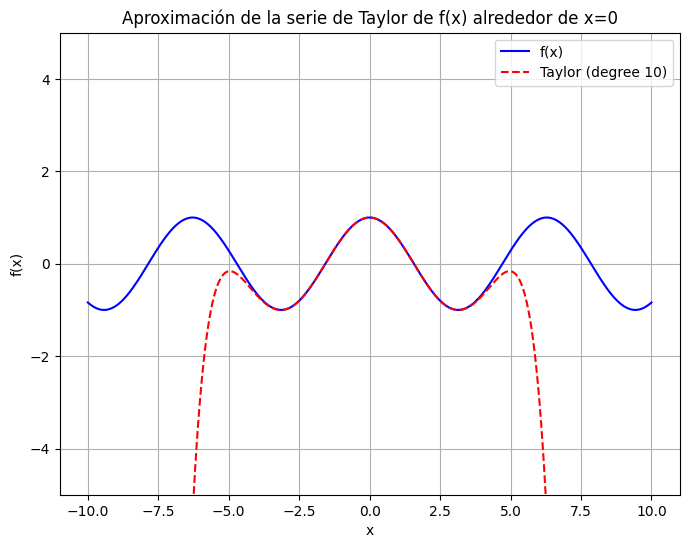

In [39]:
x = sp.symbols('x')
dibujar_taylor_aproximacion(sp.cos(x), 0, 10)

### [1.1.2. Taylor Series](#INDICE)

Una función $f(x)$ definida en un intervalo es suave si para cualquier entero no negativo $k$, la derivada k-ésima de $f(x)$ existe y es continua.  
Para una función suave $\in$ $C^{\infty}$, $f:\mathbb{R}\rightarrow\mathbb{R}$, la serie de Taylor de $f$ en $x_0$ es definido por:
$$
T_{\infty}(x)=\sum_{k=0}^{\infty}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k
$$
* Para $x_0=0$ obtenemos una seria de Maclaurin como una instancia especial de la serie de Taylor. 
* Si $f(x)=T_{\infty}(x)$, entonces $f$ es llamada analítica.
* $f \in C^{\infty}$ significa que $f$ es continuamente diferenciable infinitamente muchas veces.

#### Ejemplo

$f(x)=sin(x)+cos(x) \in C^{\infty}$
Buscamos una expansión de Taylor series de $f$ en $x_0=0$, que es la expansión de la serie de Maclaurin de $f$.  
Obtenemos las siguientes derivadas:  
$f(0)=sin(0)+cos(0)=1$  
$f'(0)=cos(0)-sin(0)=1$  
$f''(0)=-sin(0)-cos(0)=-1$  
$f^{(3)}(0)=-cos(0)+sin(0)=-1$  
$f^{(4)}(0)=sin(0)+cos(0)=f(0)=1$  
...

Podemos ver un patrón: Los coeficientes en nuestra serie de Taylor son solo $\pm$1 ya que $sin(0)=0$, cada uno de los cuales ocurre dos veces antes de cambiar al otro.  
Además $f^{(k+4)}(0)=f^{(k)}.$  
Por lo tanto la expansión total de Taylor series de $f$ en $x_0$ es dado por:  

$T_{\infty}(x)=\displaystyle\sum_{k=0}^{\infty}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$  
$T_{\infty}(x)=\displaystyle 1+x-\frac{1}{2!}x^2-\frac{1}{3!}x^3+\frac{1}{4!}x^4+\frac{1}{5!}x^5-...$  
$T_{\infty}(x)=\displaystyle\textcolor{red}{1-\frac{1}{2!}x^2+\frac{1}{4!}x^4 \mp... }+ \textcolor{blue}{x-\frac{1}{3!}x^3 +\frac{1}{5!}x^5\mp...}$  
$T_{\infty}(x)=\textcolor{red}{\displaystyle\sum_{k=0}^{\infty}(-1)^k\frac{1}{(2k)!}x^{2k}}+\textcolor{blue}{\displaystyle\sum_{k=0}^{\infty}(-1)^k\frac{1}{(2k+1)!}x^{2k+1}}$  
$T_{\infty}(x)=\displaystyle\textcolor{red}{cos(x)}+\textcolor{blue}{sin(x)}$  

Donde hemos usado representaciones de series de potencias:  
$\displaystyle cos(x)=\sum_{k=0}^{\infty}(-1)^{k}\frac{1}{(2k)!}x^{2k}$  
$\displaystyle sin(x)=\sum_{k=0}^{\infty}(-1)^{k}\frac{1}{(2k+1)!}x^{2k+1}$

In [6]:
#serie_taylor(sp.sin(x)+sp.cos(x), x, x_0=0, degree=8)
serie_taylor(sp.sin(x)+sp.cos(x), x, x_0=0, degree=10,eval_point=math.radians(0))

T_0(x) = 0
T_1(x) = 1
T_2(x) = x + 1
T_3(x) = -x**2/2 + x + 1
T_4(x) = -x**3/6 - x**2/2 + x + 1
T_5(x) = x**4/24 - x**3/6 - x**2/2 + x + 1
T_6(x) = x**5/120 + x**4/24 - x**3/6 - x**2/2 + x + 1
T_7(x) = -x**6/720 + x**5/120 + x**4/24 - x**3/6 - x**2/2 + x + 1
T_8(x) = -x**7/5040 - x**6/720 + x**5/120 + x**4/24 - x**3/6 - x**2/2 + x + 1
T_9(x) = x**8/40320 - x**7/5040 - x**6/720 + x**5/120 + x**4/24 - x**3/6 - x**2/2 + x + 1
T_10(x) = x**9/362880 + x**8/40320 - x**7/5040 - x**6/720 + x**5/120 + x**4/24 - x**3/6 - x**2/2 + x + 1
T_10(0.0) = 1.00000000000000


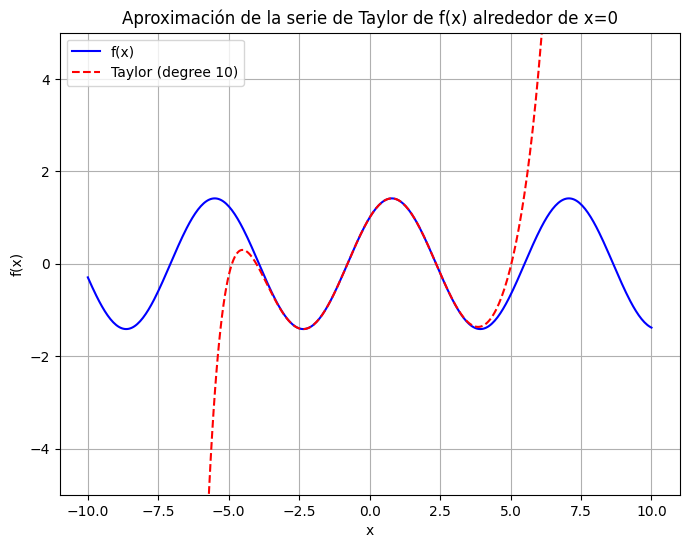

In [7]:
x = sp.symbols('x')
dibujar_taylor_aproximacion(sp.sin(x)+sp.cos(x), 0, 10)

## [1.2. Reglas de las derivadas](#INDICE)

Producto: $\displaystyle(f(x)g(x))'=f'(x)g(x)+f(x)g'(x)$  
Cociente: $\displaystyle\left(\frac{f(x)}{g(x)}\right)=\frac{f'(x)g(x)-f(x)g'(x)}{(g(x))^2}$  
Suma: $\displaystyle(f(x)+g(x))'=f'(x)+g'(x)$  
Cadena: $\displaystyle(g(f(x)))'=(g \circ f)'(x)=g'(f(x))f'(x)$

* Donde, g o f denota composición de funciones: $x$ $\to$ $f(x)$ $\to$ g(f(x)).

### Ejemplo

Calculemos la derivada de esta función: $h(x)=(2x+1)^4$  
$h(x)=(2x+1)^4=g(f(x))$  
$f(x)=2x+1$  
$g(f)=f^4$  
Obtenemos las derivadas de $f$ y $g$:  
$f'(x)=2$  
$g'(x)=4f^3$  
Tal que la derivada de $h$ está dada por:  
$h'(x)=g'(f)f'(x)=(4f^3).2=4(2x+1)^3.2=8(2x+1)^3$  

In [16]:
h=(2*x+1)**4
sp.diff(h,x)

8*(2*x + 1)**3